Graphs for Fig 4, model panels

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics
from math import sqrt
from skmisc.loess import loess
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

model = 'UTG' # DUAL / UTG
path = 'UTG-EF_14rows_CUC_MD/' # DUAL_14rows_CUC_MD/, UTG-EF_14rows_CUC_MD/

#path_single = '../out_batch/batch_2023-03-20_12-00-44_UTG_single/'
#path_multi = '../out_batch/batch_2023-03-20_12-07-21_UTG_multi/'

path_single = '../out_batch/batch_2023-03-20_14-30-00_dual_single/'
path_multi = '../out_batch/batch_2023-03-20_14-37-02_dual_multi/'

data_single_raw_s1 = pd.read_csv(path_single + 'auxin_profile_1.csv')
data_single_raw_s2 = pd.read_csv(path_single + 'auxin_profile_2.csv')
data_single_raw_s3 = pd.read_csv(path_single + 'auxin_profile_3.csv')
data_single_raw_s4 = pd.read_csv(path_single + 'auxin_profile_4.csv')
data_single_raw_s5 = pd.read_csv(path_single + 'auxin_profile_5.csv')
data_single_raw_s6 = pd.read_csv(path_single + 'auxin_profile_6.csv')
data_single_raw_s7 = pd.read_csv(path_single + 'auxin_profile_7.csv')
data_single_raw_s8 = pd.read_csv(path_single + 'auxin_profile_8.csv')

data_multi_raw_s1 = pd.read_csv(path_multi + 'auxin_profile_multiple_1.csv')
data_multi_raw_s2 = pd.read_csv(path_multi + 'auxin_profile_multiple_2.csv')
data_multi_raw_s3 = pd.read_csv(path_multi + 'auxin_profile_multiple_3.csv')
data_multi_raw_s4 = pd.read_csv(path_multi + 'auxin_profile_multiple_4.csv')
data_multi_raw_s5 = pd.read_csv(path_multi + 'auxin_profile_multiple_5.csv')
data_multi_raw_s6 = pd.read_csv(path_multi + 'auxin_profile_multiple_6.csv')
data_multi_raw_s7 = pd.read_csv(path_multi + 'auxin_profile_multiple_7.csv')
data_multi_raw_s8 = pd.read_csv(path_multi + 'auxin_profile_multiple_8.csv')

# Select first 13 rows only
data_single_raw_s1, data_single_raw_s2, data_single_raw_s3, data_single_raw_s4, data_single_raw_s5, data_single_raw_s6, data_single_raw_s7, data_single_raw_s8, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8 = [i.head(13) for i in [data_single_raw_s1, data_single_raw_s2, data_single_raw_s3, data_single_raw_s4, data_single_raw_s5, data_single_raw_s6, data_single_raw_s7, data_single_raw_s8, data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]]

# Give x values (cell row) to all datasets
data_x = np.linspace(1, len(data_single_raw_s1.index), len(data_single_raw_s1.index))
data_single_raw_s1['x'], data_single_raw_s2['x'], data_single_raw_s3['x'], data_single_raw_s4['x'], data_single_raw_s5['x'], data_single_raw_s6['x'], data_single_raw_s7['x'], data_single_raw_s8['x'], data_multi_raw_s1['x'], data_multi_raw_s2['x'], data_multi_raw_s3['x'], data_multi_raw_s4['x'], data_multi_raw_s5['x'], data_multi_raw_s6['x'], data_multi_raw_s7['x'], data_multi_raw_s8['x'] = data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x, data_x

all_single_samples = [data_single_raw_s1, data_single_raw_s2, data_single_raw_s3, data_single_raw_s4, data_single_raw_s5, data_single_raw_s6, data_single_raw_s7, data_single_raw_s8]

all_multi_samples = [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]

# Calculate mean and median of profiles replicates
mean_s1, mean_s2, mean_s3, mean_s4, mean_s5, mean_s6, mean_s7, mean_s8 = [i.drop(columns=['x']).mean(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]]
median_s1, median_s2, median_s3 = [i.drop(columns=['x']).median(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3]]

all_means = [i.drop(columns=['x']).mean(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3, data_multi_raw_s4, data_multi_raw_s5, data_multi_raw_s6, data_multi_raw_s7, data_multi_raw_s8]]
median_s1, median_s2, median_s3 = [i.drop(columns=['x']).median(axis=1) for i in [data_multi_raw_s1, data_multi_raw_s2, data_multi_raw_s3]]

# This is only needed for loess
data_multi_melted_s1 = pd.melt(data_multi_raw_s1, id_vars='x', value_name='y').sort_values(by='x').reset_index()
data_multi_melted_s2 = pd.melt(data_multi_raw_s2, id_vars='x', value_name='y').sort_values(by='x').reset_index()
data_multi_melted_s3 = pd.melt(data_multi_raw_s3, id_vars='x', value_name='y').sort_values(by='x').reset_index()

In [13]:
data_single_raw_s1

,0,x
0,230.915831,1.0
1,243.939117,2.0
2,131.294018,3.0
3,72.443509,4.0
4,41.501314,5.0
5,47.500058,6.0
6,41.453764,7.0
7,54.431478,8.0
8,109.994289,9.0
9,74.335817,10.0


In [14]:
data_multi_raw_s1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,x
0,276.970209,272.874604,275.288402,277.068671,265.446309,229.337600,283.292055,289.414731,273.553956,280.267202,...,275.478374,274.636002,275.226157,290.587610,272.820690,269.334378,274.114561,282.098082,264.683204,1.0
1,243.912671,243.417214,243.427113,244.246634,242.785552,245.075354,243.990057,245.320404,244.194885,244.757640,...,245.197700,244.317956,244.523343,245.852352,243.659541,243.964656,244.309187,245.253535,243.007210,2.0
2,137.193118,138.359256,135.463683,140.312529,135.614080,140.750816,132.457693,150.234999,142.137584,146.427150,...,143.606267,146.285696,143.894136,145.313270,136.089359,144.898105,136.174009,146.792383,133.092708,3.0
3,85.363921,81.730030,84.164857,89.867284,79.455343,85.200157,72.065977,98.451415,82.728388,82.238761,...,74.170729,92.368467,87.185350,89.271813,86.551738,89.148098,71.441125,93.805793,78.164503,4.0
4,59.581820,49.331545,50.006819,56.549498,51.973368,48.983144,46.084906,72.936486,57.054055,45.283901,...,45.368678,49.291203,59.861752,61.211966,57.095336,58.518131,47.144695,58.309975,54.542664,5.0
5,45.263319,30.130369,33.491732,32.399002,36.189169,30.291033,41.227964,53.956513,40.748903,44.888848,...,39.139283,32.575933,35.813628,50.032665,46.710480,39.359843,33.615317,54.871283,49.633916,6.0
6,46.440983,32.573048,30.045366,33.883512,37.016351,33.673349,32.662965,41.709213,32.398780,35.442026,...,39.018868,38.215915,36.598734,37.754627,42.075550,42.461250,35.608691,47.272675,43.877710,7.0
7,38.797764,31.417658,27.534334,32.633499,35.509388,31.652258,27.555279,35.098750,30.015821,32.162453,...,35.769998,41.736829,44.172562,40.770774,44.373088,44.480698,37.720538,41.192421,37.987004,8.0
8,53.152814,45.071322,34.002639,40.852033,37.153353,37.695369,36.071840,41.167240,48.627564,39.562881,...,56.179301,44.037688,51.026435,48.788336,53.197017,68.880592,56.113459,61.870604,49.912178,9.0
9,53.271334,62.232283,39.853050,48.177718,24.927963,44.684891,37.206934,45.946489,41.290235,29.038347,...,74.686530,60.396558,44.244008,66.314922,75.324988,57.377867,63.727854,62.595859,41.928601,10.0


In [15]:
# Function to calculate loess curves

def loess_fit(x, y, span=1):
    """
    Loess fit and confidence intervals.
    The span controls the fraction of points used for the local regressions. The default of loess() is 0.75.
    prediction.confidence(a) -> if a = 0.05, CI = 95
    """
    # setup
    lo = loess(x, y, span=span)
    # fit
    lo.fit()
    # Predict
    prediction = lo.predict(x, stderror=True)
    # Compute confidence intervals
    ci = prediction.confidence(0.05)
    # Since we are wrapping the functionality in a function,
    # we need to make new arrays that are not tied to the
    # loess objects
    yfit = prediction.values
    ymin = ci.lower
    ymax = ci.upper
    return {'x': x, 'yfit': yfit, 'ymin': ymin, 'ymax': ymax}

In [16]:
# Calculate loess
#l_x, l_yfit, l_ymin, l_ymax = loess_fit(data_multi_melted_s1['x'], data_multi_melted['y'], span=.75)
loess_s1 = loess_fit(data_multi_melted_s1['x'], data_multi_melted_s1['y'], span=.75)
loess_s2 = loess_fit(data_multi_melted_s2['x'], data_multi_melted_s2['y'], span=.75)
loess_s3 = loess_fit(data_multi_melted_s3['x'], data_multi_melted_s3['y'], span=.75)


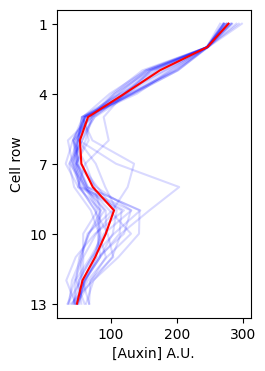

In [17]:
# Make figure multiple samples
fig1, ax1 = plt.subplots(1,1, figsize=(2.5,4))

#ax1.plot(data_single_raw_s1['0'], data_single_raw_s1['x'], color='blue')
#ax1.plot(data_single_raw_s2['0'], data_single_raw_s2['x'], color='blue')
#ax1.plot(data_single_raw_s5['0'], data_single_raw_s5['x'], color='red')
#ax1.plot(data_single_raw_s4['0'], data_single_raw_s4['x'], color='blue')

#for col in data_multi_raw_s1.drop(columns=['x']):
    #ax1.plot(data_multi_raw_s1[col], data_multi_raw_s1['x'], color='blue', alpha=.15)
#for col in data_multi_raw_s2.drop(columns=['x']):
    #ax1.plot(data_multi_raw_s2[col], data_multi_raw_s2['x'], color='red', alpha=.15)
for col in data_multi_raw_s2.drop(columns=['x']):
    ax1.plot(data_multi_raw_s2[col], data_multi_raw_s2['x'], color='blue', alpha=.15)
#for col in data_multi_raw_s4.drop(columns=['x']):
#    ax1.plot(data_multi_raw_s4[col], data_multi_raw_s4['x'], color='blue', alpha=.15)
#for col in data_multi_raw_s5.drop(columns=['x']):
    #ax1.plot(data_multi_raw_s5[col], data_multi_raw_s5['x'], color='red', alpha=.15)

#ax1.fill_betweenx(loess_s1['x'], loess_s1['ymin'], loess_s1['ymax'], alpha=.2, color='blue', linewidth=0)
#ax1.fill_betweenx(loess_s2['x'], loess_s2['ymin'], loess_s2['ymax'], alpha=.2, color='red', linewidth=0)
#ax1.fill_betweenx(loess_s3['x'], loess_s3['ymin'], loess_s3['ymax'], alpha=.2, color='green', linewidth=0)

#ax1.plot(mean_s1, data_x, color='blue', linestyle='--')
ax1.plot(mean_s2, data_x, color='red')
#ax1.plot(mean_s3, data_x, color='red', linestyle='--')
#ax1.plot(mean_s4, data_x, color='blue')
#ax1.plot(mean_s5, data_x, color='red', linestyle='--')
#ax1.plot(mean_s6, data_x, color='green', linestyle='--')

ax1.set_yticks([1,4,7,10,13])
ax1.invert_yaxis()
plt.xlabel('[Auxin] A.U.')
plt.ylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

In [18]:
# Make figure 2 (individual plots)

def make_individual_plot(sample_single=None, sample_multi=None, mean=None, x=data_x, loess=None):

    fig2, ax1 = plt.subplots(1,1, figsize=(3,4))

    #ax1.plot(sample_single['0'], sample_single['x'], color='blue', linestyle='--')

    for col in sample_multi.drop(columns=['x']):
        ax1.plot(sample_multi[col], sample_multi['x'], color='blue', alpha=.15)

    #ax1.fill_betweenx(loess['x'], loess['ymin'], loess['ymax'], alpha=.2, color='blue', linewidth=0)

    ax1.plot(mean, data_x, color='blue')

    ax1.set_yticks([1,4,7,10,13])
    ax1.invert_yaxis()
    plt.xlabel('[Auxin] A.U.')
    plt.ylabel('Cell row')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
    #fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

    plt.show()

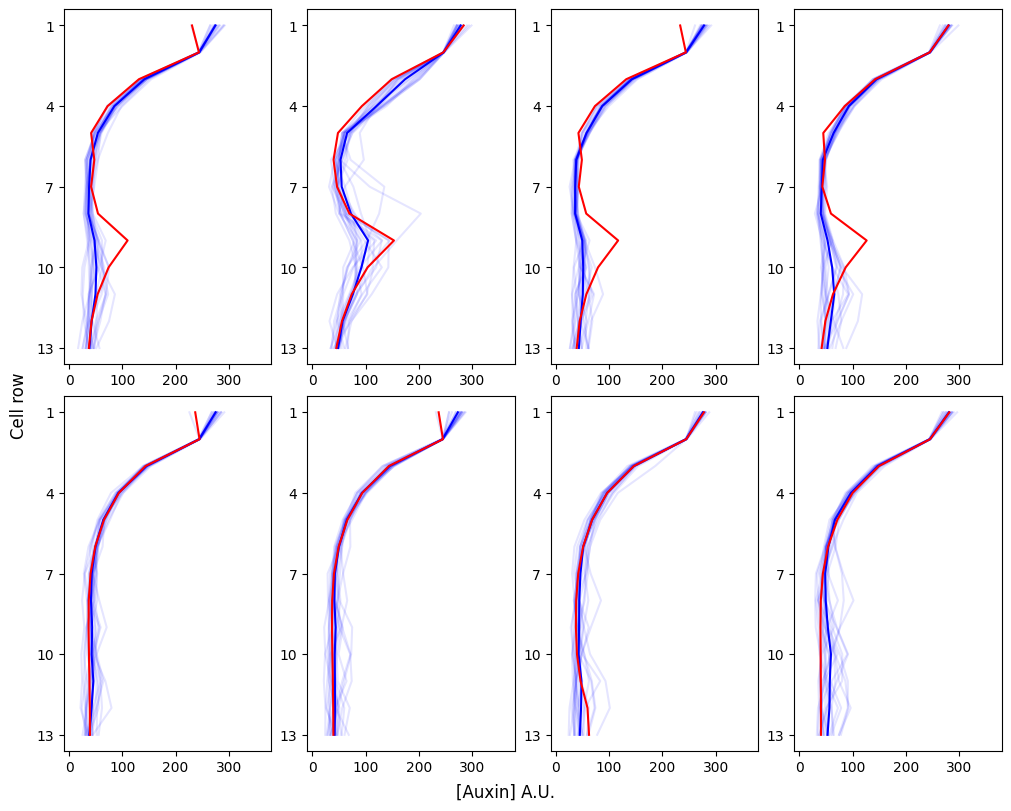

In [19]:
# Individual composite plot

fig3, axes = plt.subplots(2,4, figsize=(10,8), constrained_layout=True)

for data, ax in zip(all_multi_samples, axes.ravel()):
    for col in data.drop(columns=['x']):
        ax.plot(data[col], data['x'], color='blue', alpha=.1)

for mean, ax in zip(all_means, axes.ravel()):
    ax.plot(mean, data_x, color='blue')

for data, ax in zip(all_single_samples, axes.ravel()):
    ax.plot(data['0'], data_x, color='red')

for ax in axes.ravel():    
    ax.set_yticks([1,4,7,10,13])
    ax.invert_yaxis()
    ax.set_xlim(-10,380)
    
fig3.supxlabel('[Auxin] A.U.')
fig3.supylabel('Cell row')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_comapre.png', bbox_inches='tight')
#fig1.savefig('00_data/PIN1-CUC1-distTip/scatter_compare.svg', bbox_inches='tight')

plt.show()

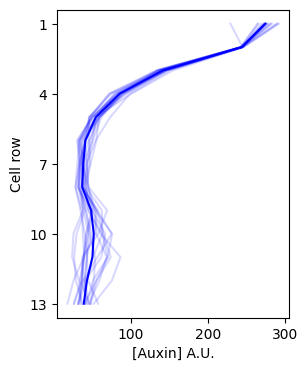

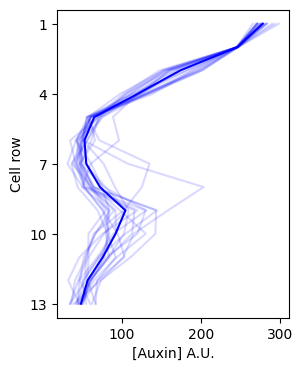

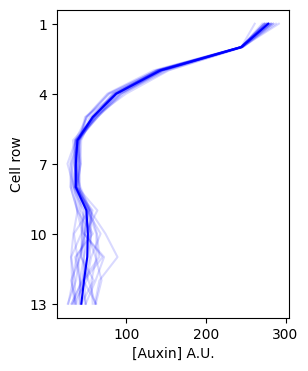

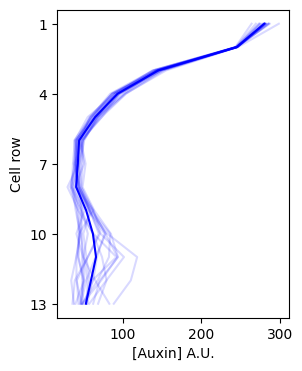

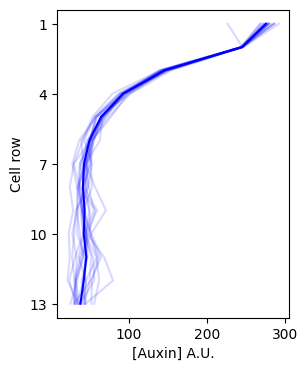

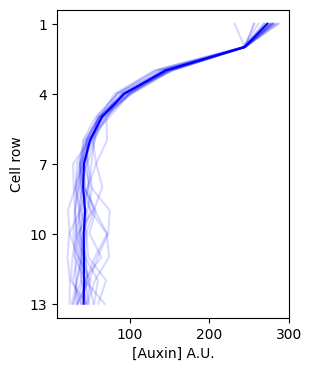

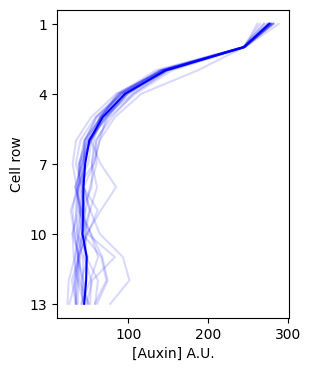

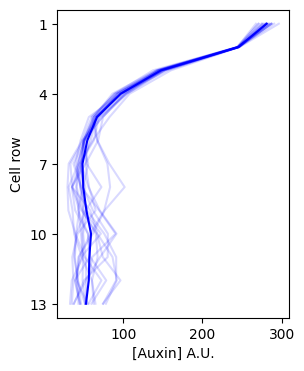

In [20]:
make_individual_plot(data_single_raw_s1, data_multi_raw_s1, mean_s1)